<a href="https://colab.research.google.com/github/anjali20082/PerfEval/blob/master/CorrelationAnalysis_PythonNotebooks/Response_Time_Analysis/response_times_byaranisir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/jumbo_feature.csv')
df

,FEATURE,STUDENT,ANDROID,DISTANCE,RAM,LATENCY,TIME_OF_DAY,NET_TYPE,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK,PING_VARIANCE_GOOGLE,PING_VARIANCE_AMAZON,PING_VARIANCE_MOBIKWIK,PING_MIN_GOOGLE,PING_MIN_AMAZON,PING_MIN_MOBIKWIK
0,Youtube_search channel page,vandana20106@iiitd.ac.in,11,0.000000,8,1008,1,0,8.35,12.20,32.0,53.536932,310.423162,47.857387,3.49,3.57,25.9
1,Youtube_open channel page,vandana20106@iiitd.ac.in,11,0.000000,8,1836,1,0,8.35,12.20,32.0,53.536932,310.423162,47.857387,3.49,3.57,25.9
2,Youtube_search video page,vandana20106@iiitd.ac.in,11,0.000000,8,1209,1,0,8.35,14.50,31.5,60.708051,336.357735,63.212699,3.49,3.57,25.9
3,Youtube_play video page,vandana20106@iiitd.ac.in,11,0.000000,8,4080,1,0,8.35,14.50,31.5,60.708051,336.357735,63.212699,3.49,3.57,25.9
4,LinkedIn_my profile page,vandana20106@iiitd.ac.in,11,0.000000,8,102,1,0,7.43,16.70,30.2,98.971308,370.749097,98.904576,3.35,3.57,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26353,Whatsapp_sending message,akhil20107@iiitd.ac.in,6,0.564232,10,1644,1,1,55.85,69.85,76.0,574.744244,192.536123,3758.935986,34.40,49.70,55.9
26354,GoogleMaps_searching place,akhil20107@iiitd.ac.in,6,0.564232,10,4386,1,1,56.15,69.80,74.5,573.754775,231.027901,7175.290809,34.40,49.70,55.9
26355,GoogleNews_opening news page,akhil20107@iiitd.ac.in,6,0.564232,10,2766,1,1,58.50,70.40,74.8,540.281067,275.775695,7499.583795,34.40,49.70,55.9
26356,Dailyhunt_opening news page,akhil20107@iiitd.ac.in,6,0.564232,10,1896,1,1,60.25,74.80,76.3,486.110176,296.824275,7479.584976,34.40,49.70,55.9


In [ ]:
distances = df[['DISTANCE']].values[:, 0]
ping_median_google = np.median(df['PING_MEDIAN_GOOGLE'])
ping_median_google

50.0

In [ ]:
samsung_df = pd.read_csv('/content/drive/MyDrive/Capstone_PerfEval/Plots_w_location/samsung_s10_night.csv')
infinix_df = pd.read_csv('/content/drive/MyDrive/Capstone_PerfEval/Plots_w_location/infinix_night.csv')

In [ ]:
df[['FEATURE', 'STUDENT','LATENCY']]

,FEATURE,STUDENT,LATENCY
0,Youtube_search channel page,vandana20106@iiitd.ac.in,1008
1,Youtube_open channel page,vandana20106@iiitd.ac.in,1836
2,Youtube_search video page,vandana20106@iiitd.ac.in,1209
3,Youtube_play video page,vandana20106@iiitd.ac.in,4080
4,LinkedIn_my profile page,vandana20106@iiitd.ac.in,102
...,...,...,...
26353,Whatsapp_sending message,akhil20107@iiitd.ac.in,1644
26354,GoogleMaps_searching place,akhil20107@iiitd.ac.in,4386
26355,GoogleNews_opening news page,akhil20107@iiitd.ac.in,2766
26356,Dailyhunt_opening news page,akhil20107@iiitd.ac.in,1896


In [ ]:
#df.loc[df['STUDENT'] == 'infinix_pro_night', 'STUDENT'] = 'infinix_pro'

df.loc[(df['STUDENT'] == 'infinix_pro') | (df['STUDENT'] == 'samsung_s10') | (df['STUDENT'] == 'infinix_pro_night'), 'STUDENT'] = 'Controlled'
df = df[df['STUDENT'] != 'Controlled']
df.loc[(df['STUDENT'] != 'infinix_pro') & (df['STUDENT'] != 'samsung_s10') & (df['STUDENT'] != 'infinix_pro_night'), 'STUDENT'] = 'Uncontrolled'
df = df.append(samsung_df)
df = df.append(infinix_df)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,FEATURE,STUDENT,ANDROID,DISTANCE,RAM,LATENCY,TIME_OF_DAY,NET_TYPE,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK,PING_VARIANCE_GOOGLE,PING_VARIANCE_AMAZON,PING_VARIANCE_MOBIKWIK,PING_MIN_GOOGLE,PING_MIN_AMAZON,PING_MIN_MOBIKWIK
0,Youtube_search channel page,Uncontrolled,11,0.0,8,1008,1,0,8.35,12.2,32.00,53.536932,310.423162,47.857387,3.49,3.57,25.9
1,Youtube_open channel page,Uncontrolled,11,0.0,8,1836,1,0,8.35,12.2,32.00,53.536932,310.423162,47.857387,3.49,3.57,25.9
2,Youtube_search video page,Uncontrolled,11,0.0,8,1209,1,0,8.35,14.5,31.50,60.708051,336.357735,63.212699,3.49,3.57,25.9
3,Youtube_play video page,Uncontrolled,11,0.0,8,4080,1,0,8.35,14.5,31.50,60.708051,336.357735,63.212699,3.49,3.57,25.9
4,LinkedIn_my profile page,Uncontrolled,11,0.0,8,102,1,0,7.43,16.7,30.20,98.971308,370.749097,98.904576,3.35,3.57,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Youtube_search video page,infinix_night,10,0.0,4,1048,1,0,53.70,72.5,38.35,11343.091090,790.760912,7693.325606,45.70,5.66,37.5
511,Youtube_play video page,infinix_night,10,0.0,4,3734,1,0,53.70,72.5,38.35,11343.091090,790.760912,7693.325606,45.70,5.66,37.5
512,Facebook_post in a group,infinix_night,10,0.0,4,2978,1,0,59.60,72.5,38.50,9149.691467,905.418996,10243.577600,45.70,5.66,37.5
513,Facebook_search results page,infinix_night,10,0.0,4,4234,1,0,55.30,72.3,38.90,14444.726020,1029.066300,14507.118550,45.80,5.66,37.6


(0.0, 200.0)

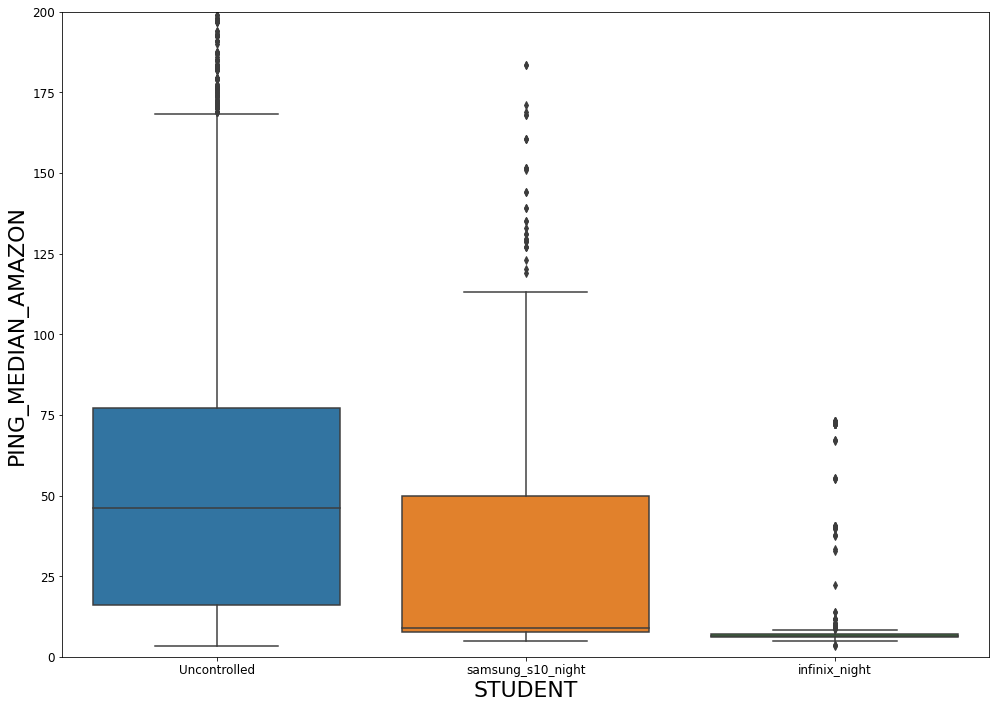

In [ ]:
import seaborn as sns
ax = sns.boxplot(x = df['STUDENT'],
            y = df['PING_MEDIAN_AMAZON']
            )
# plt.xticks(rotation=15)
plt.ylim(0, 200)
#plt.savefig('amazon.pdf', bbox_inches='tight')

In [ ]:
# df = group.apply(pd.Series)

# df.reset_index(inplace=True)
df[['APP', 'ACTION']] = df['FEATURE'].str.split('_', expand=True)
df[['APP', 'ACTION', 'STUDENT']]
df[df['APP'] == 'Facebook']

,FEATURE,STUDENT,ANDROID,DISTANCE,RAM,LATENCY,TIME_OF_DAY,NET_TYPE,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK,PING_VARIANCE_GOOGLE,PING_VARIANCE_AMAZON,PING_VARIANCE_MOBIKWIK,PING_MIN_GOOGLE,PING_MIN_AMAZON,PING_MIN_MOBIKWIK,APP,ACTION
8,Facebook_search results page,Uncontrolled,11,0.0,8,3323,1,0,5.625,7.28,29.50,83.821201,216.048205,121.937026,3.15,3.61,25.2,Facebook,search results page
9,Facebook_person profile page,Uncontrolled,11,0.0,8,830,1,0,5.625,7.28,29.50,83.821201,216.048205,121.937026,3.15,3.61,25.2,Facebook,person profile page
19,Facebook_search results page,Uncontrolled,11,0.0,8,3014,1,1,45.400,48.70,44.05,5292.115086,3397.619119,2999.738220,18.60,21.60,18.4,Facebook,search results page
20,Facebook_person profile page,Uncontrolled,11,0.0,8,1766,1,1,45.400,48.70,44.05,5292.115086,3397.619119,2999.738220,18.60,21.60,18.4,Facebook,person profile page
30,Facebook_search results page,Uncontrolled,11,0.0,8,3972,0,0,16.600,15.30,39.55,79.129925,144.399450,232.998275,3.55,3.68,25.9,Facebook,search results page
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Facebook_search results page,infinix_night,10,0.0,4,4290,1,0,48.700,6.35,40.00,789.781763,376.143068,7524.400710,46.90,5.88,37.8,Facebook,search results page
489,Facebook_person profile page,infinix_night,10,0.0,4,1988,1,0,48.700,6.35,40.00,789.781763,376.143068,7524.400710,46.90,5.88,37.8,Facebook,person profile page
512,Facebook_post in a group,infinix_night,10,0.0,4,2978,1,0,59.600,72.50,38.50,9149.691467,905.418996,10243.577600,45.70,5.66,37.5,Facebook,post in a group
513,Facebook_search results page,infinix_night,10,0.0,4,4234,1,0,55.300,72.30,38.90,14444.726020,1029.066300,14507.118550,45.80,5.66,37.6,Facebook,search results page


In [ ]:
plt.rcParams.update({'figure.autolayout': True})
mlt.rcParams['figure.figsize'] = 14, 10
boxprops = dict(linewidth=4)
medianprops = dict(linewidth=4)

SMALL_SIZE = 12
MEDIUM_SIZE = 22
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
df

,FEATURE,STUDENT,ANDROID,DISTANCE,RAM,LATENCY,TIME_OF_DAY,NET_TYPE,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK,PING_VARIANCE_GOOGLE,PING_VARIANCE_AMAZON,PING_VARIANCE_MOBIKWIK,PING_MIN_GOOGLE,PING_MIN_AMAZON,PING_MIN_MOBIKWIK
0,Youtube_search channel page,vandana20106@iiitd.ac.in,11,0.000000,8,1008,1,0,8.35,12.20,32.0,53.536932,310.423162,47.857387,3.49,3.57,25.9
1,Youtube_open channel page,vandana20106@iiitd.ac.in,11,0.000000,8,1836,1,0,8.35,12.20,32.0,53.536932,310.423162,47.857387,3.49,3.57,25.9
2,Youtube_search video page,vandana20106@iiitd.ac.in,11,0.000000,8,1209,1,0,8.35,14.50,31.5,60.708051,336.357735,63.212699,3.49,3.57,25.9
3,Youtube_play video page,vandana20106@iiitd.ac.in,11,0.000000,8,4080,1,0,8.35,14.50,31.5,60.708051,336.357735,63.212699,3.49,3.57,25.9
4,LinkedIn_my profile page,vandana20106@iiitd.ac.in,11,0.000000,8,102,1,0,7.43,16.70,30.2,98.971308,370.749097,98.904576,3.35,3.57,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26353,Whatsapp_sending message,akhil20107@iiitd.ac.in,6,0.564232,10,1644,1,1,55.85,69.85,76.0,574.744244,192.536123,3758.935986,34.40,49.70,55.9
26354,GoogleMaps_searching place,akhil20107@iiitd.ac.in,6,0.564232,10,4386,1,1,56.15,69.80,74.5,573.754775,231.027901,7175.290809,34.40,49.70,55.9
26355,GoogleNews_opening news page,akhil20107@iiitd.ac.in,6,0.564232,10,2766,1,1,58.50,70.40,74.8,540.281067,275.775695,7499.583795,34.40,49.70,55.9
26356,Dailyhunt_opening news page,akhil20107@iiitd.ac.in,6,0.564232,10,1896,1,1,60.25,74.80,76.3,486.110176,296.824275,7479.584976,34.40,49.70,55.9


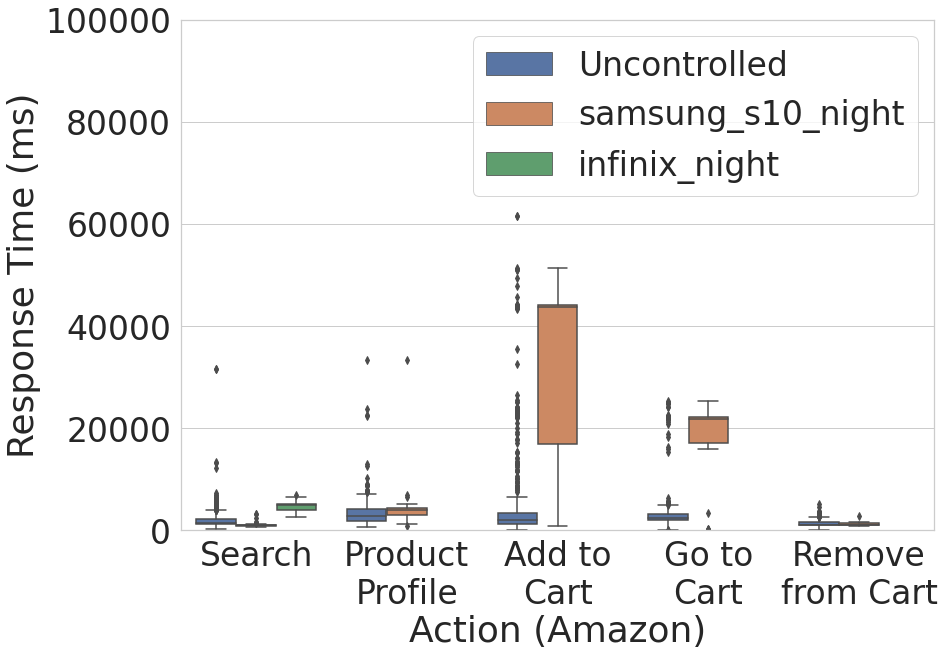

In [ ]:
amazon_df = df[df['APP'] == 'Amazon']
import seaborn as sns
sns.set(font_scale = 3)
sns.set_style("whitegrid")
ax = sns.boxplot(x = amazon_df['ACTION'],
            y = amazon_df['LATENCY'],
            hue = amazon_df['STUDENT']).set(xlabel='Action (Amazon)', ylabel='Response Time (ms)')
locs, labels = plt.xticks()
plt.xticks(locs, ['Search', 'Product\nProfile', 'Add to\nCart', 'Go to\nCart', 'Remove\nfrom Cart'])
plt.legend(title=None)

#plt.xticks(rotation=15)
plt.ylim(0, 100000)
plt.savefig('amazon.pdf', bbox_inches='tight')

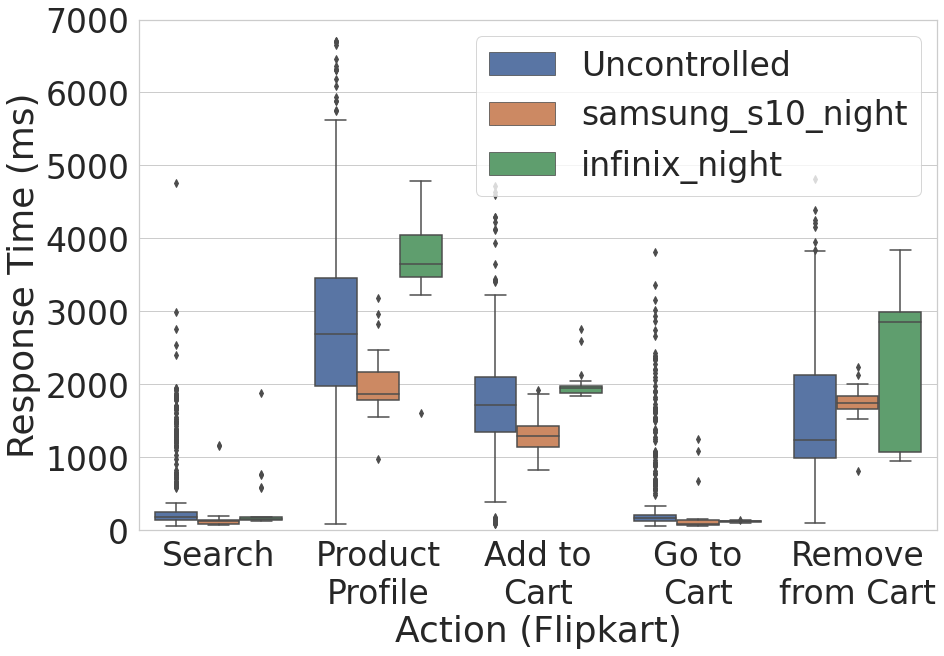

In [ ]:
flip_df = df[df['APP'] == 'Flipkart']
sns.boxplot(x = flip_df['ACTION'],
            y = flip_df['LATENCY'],
            hue = flip_df['STUDENT']).set(xlabel='Action (Flipkart)', ylabel='Response Time (ms)')
# plt.xticks(rotation=15)
locs, labels = plt.xticks()
plt.xticks(locs, ['Search', 'Product\nProfile', 'Add to\nCart', 'Go to\nCart', 'Remove\nfrom Cart'])
plt.legend(title=None)
plt.ylim(0, 7000)
plt.savefig('Flipkart-2.pdf', bbox_inches='tight')

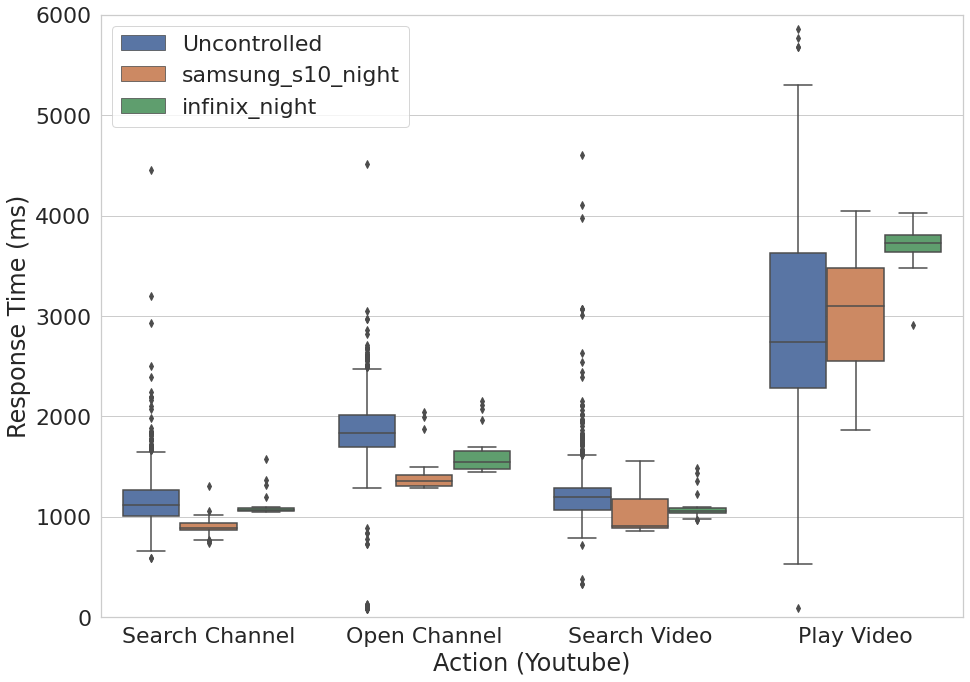

In [ ]:
ytb_df = df[df['APP'] == 'Youtube']
import seaborn as sns
sns.boxplot(x = ytb_df['ACTION'],
            y = ytb_df['LATENCY'],
            hue = ytb_df['STUDENT']).set(xlabel='Action (Youtube)', ylabel='Response Time (ms)')
# plt.xticks(rotation=15)
locs, labels = plt.xticks()
plt.xticks(locs, ['Search Channel', 'Open Channel', 'Search Video', 'Play Video'])
plt.legend(title=None)
plt.ylim(0, 6000)
plt.savefig('Youtube-2.pdf', bbox_inches='tight')

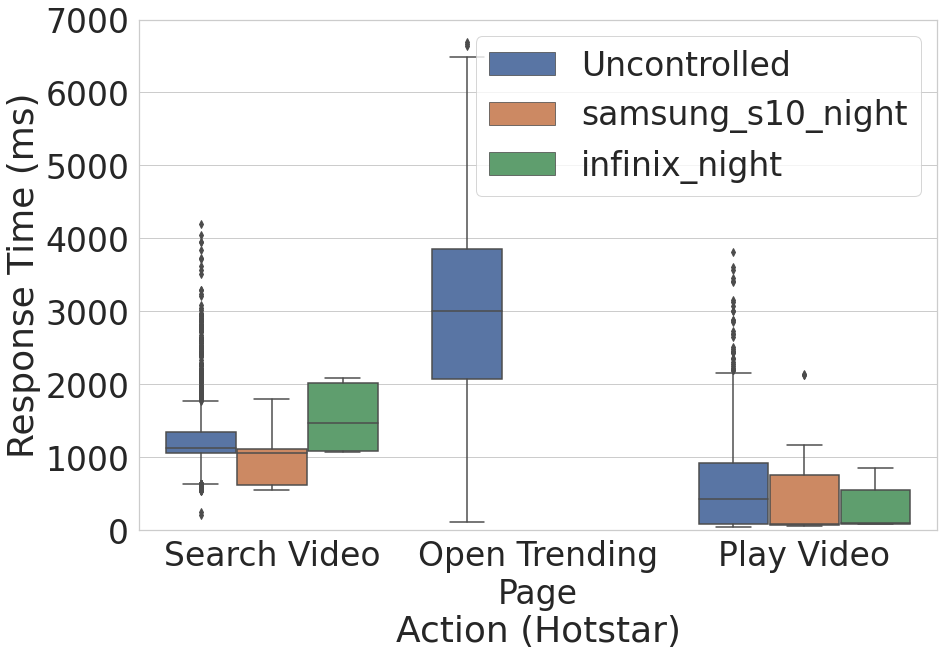

In [ ]:
hotstar_df = df[df['APP'] == 'Hotstar']
import seaborn as sns
sns.boxplot(x = hotstar_df['ACTION'],
            y = hotstar_df['LATENCY'],
            hue = hotstar_df['STUDENT']).set(xlabel='Action (Hotstar)', ylabel='Response Time (ms)')
# plt.xticks(rotation=15)
locs, labels = plt.xticks()
plt.xticks(locs, ['Search Video', 'Open Trending\nPage', 'Play Video'])
plt.legend(title=None)
plt.ylim(0, 7000)
plt.savefig('Hotstar-2.pdf', bbox_inches='tight')

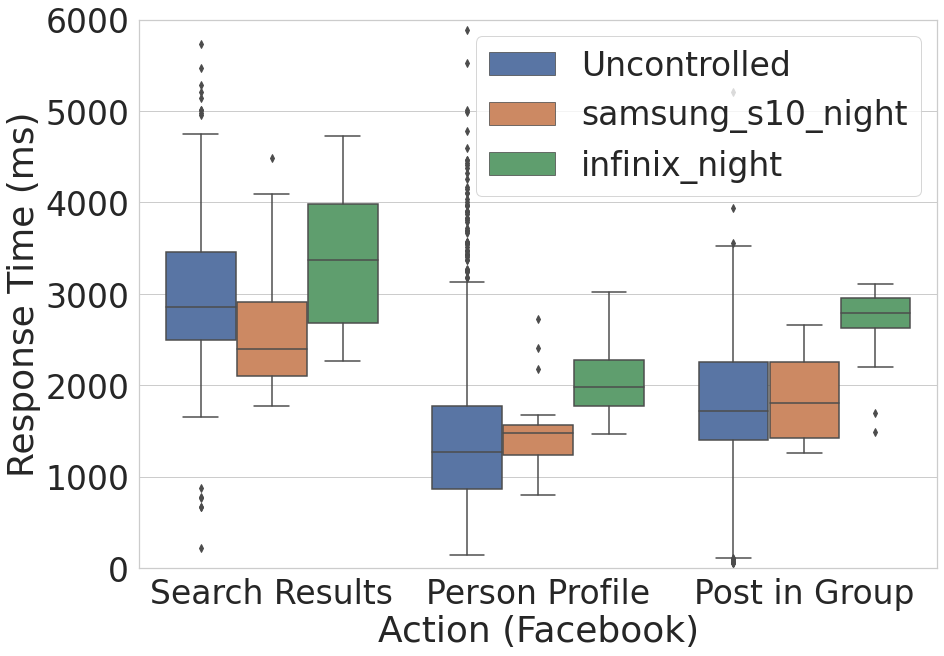

In [ ]:
fb_df = df[df['APP'] == 'Facebook']
# print(fb_df['LATENCY'])
import seaborn as sns
sns.boxplot(x = fb_df['ACTION'],
            y = fb_df['LATENCY'],
            hue = fb_df['STUDENT']).set(xlabel='Action (Facebook)', ylabel='Response Time (ms)')
# plt.xticks(rotation=15)
locs, labels = plt.xticks()
plt.xticks(locs, ['Search Results', 'Person Profile', 'Post in Group'])
plt.legend(title=None)
plt.ylim(0, 6000)
plt.savefig('Facebook-2.pdf', bbox_inches='tight')

[Text(0, 0, 'my profile page'), Text(1, 0, 'my connections page'), Text(2, 0, 'search results page'), Text(3, 0, 'person profile page')]


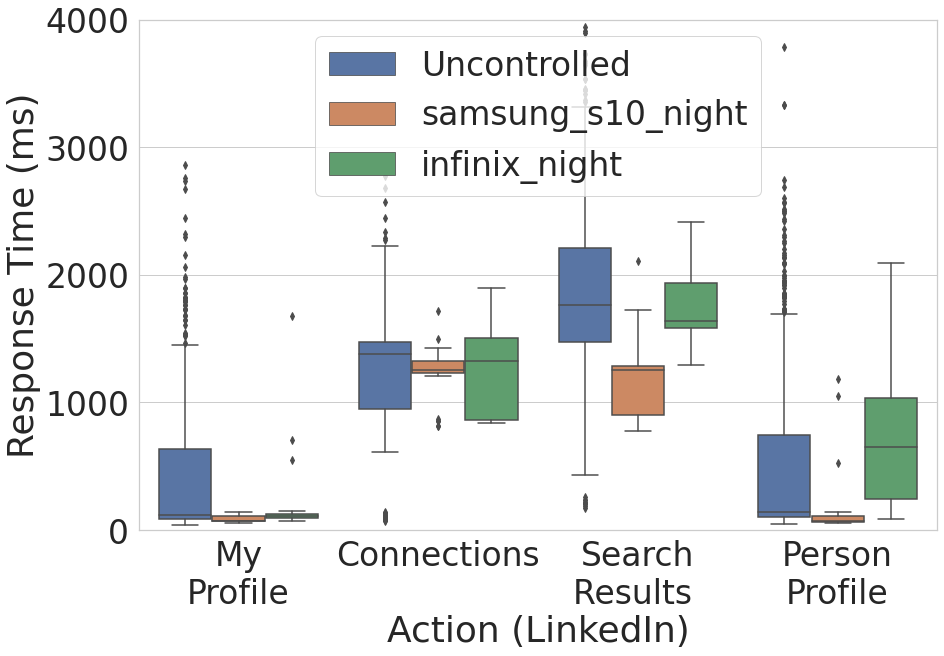

In [ ]:
lkd_df = df[df['APP'] == 'LinkedIn']
import seaborn as sns
sns.boxplot(x = lkd_df['ACTION'],
            y = lkd_df['LATENCY'],
            hue = lkd_df['STUDENT']).set(xlabel='Action (LinkedIn)', ylabel='Response Time (ms)')
# plt.xticks(rotation=15)
locs, labels = plt.xticks()
print(labels)
plt.xticks(locs, ['My\nProfile', 'Connections', 'Search\nResults ', 'Person\nProfile'])
plt.legend(title=None)
plt.ylim(0, 4000)
plt.savefig('LinkedIn-2.pdf', bbox_inches='tight')

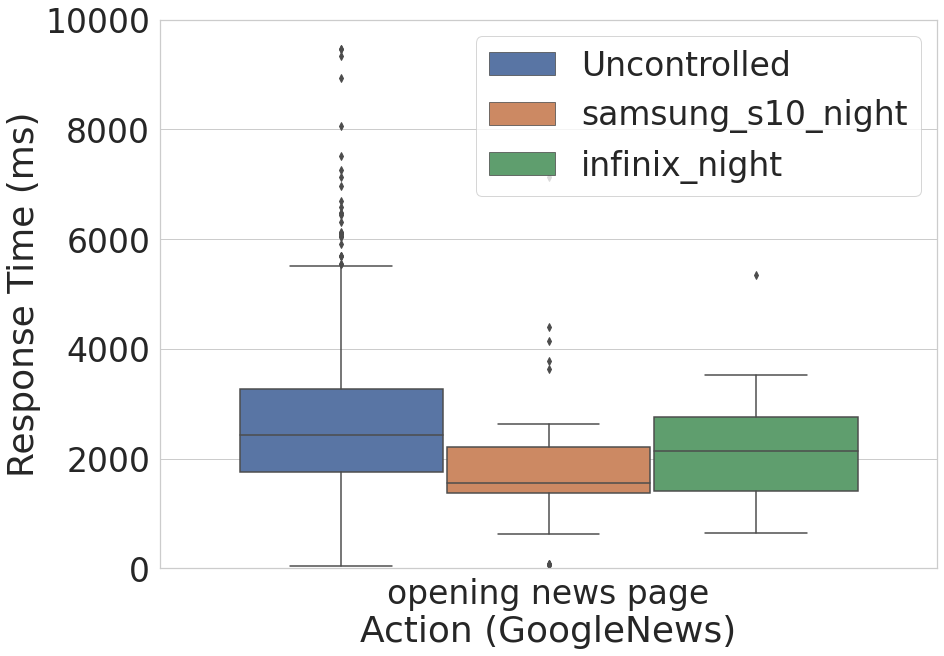

In [ ]:
gnews_df = df[df['APP'] == 'GoogleNews']
import seaborn as sns
sns.boxplot(x = gnews_df['ACTION'],
            y = gnews_df['LATENCY'],
            hue = gnews_df['STUDENT']).set(xlabel='Action (GoogleNews)', ylabel='Response Time (ms)')
plt.ylim(0, 10000)
locs, labels = plt.xticks()
#plt.xticks(locs, ['Search Channel', 'Open Channel', 'Search Video', 'Play Video'])
plt.legend(title=None)
plt.savefig('GoogleNews-2.pdf', bbox_inches='tight')

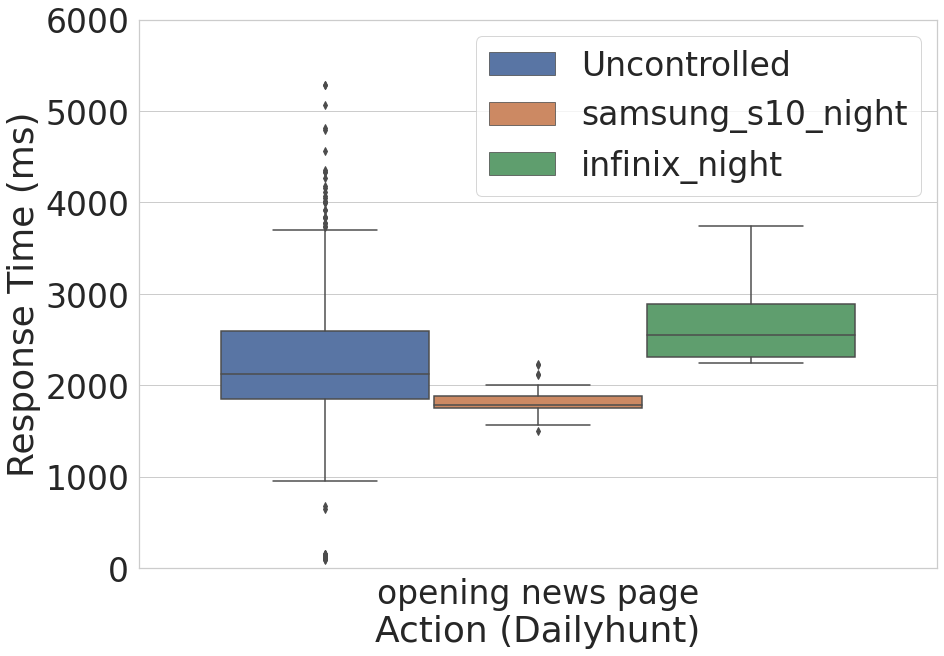

In [ ]:
dlyhunt_df = df[df['APP'] == 'Dailyhunt']
import seaborn as sns
ax = sns.boxplot(x = dlyhunt_df['ACTION'],
            y = dlyhunt_df['LATENCY'],
            hue = dlyhunt_df['STUDENT']).set(xlabel='Action (Dailyhunt)', ylabel='Response Time (ms)')
plt.ylim(0, 6000)
locs, labels = plt.xticks()
#plt.xticks(locs, ['Search Channel', 'Open Channel', 'Search Video', 'Play Video'])
plt.legend(title=None)
plt.savefig('Dailyhunt-2.pdf', bbox_inches='tight')

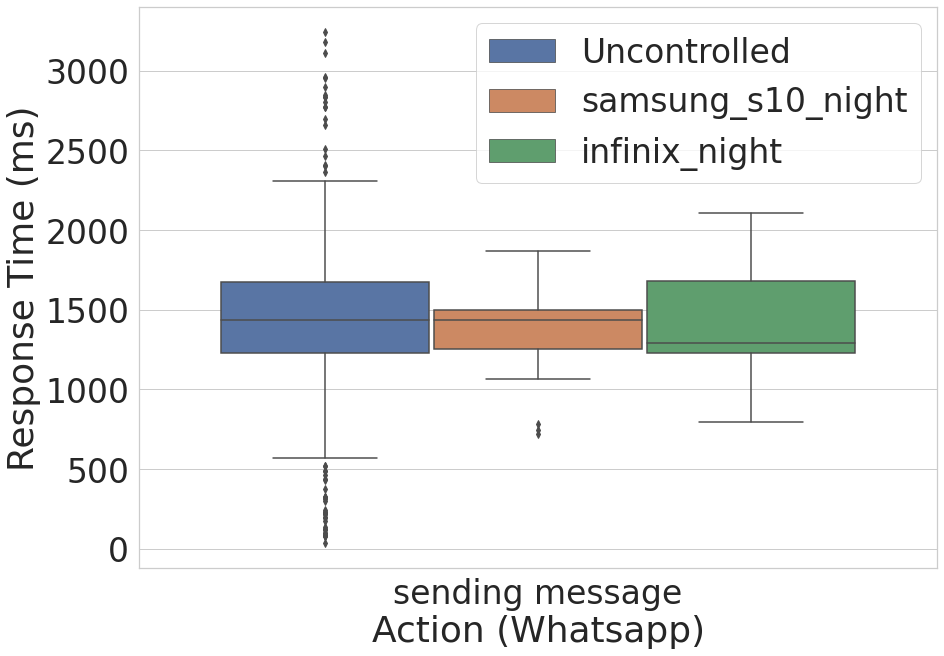

In [ ]:
wtsapp_df = df[df['APP'] == 'Whatsapp']
import seaborn as sns
ax = sns.boxplot(x = wtsapp_df['ACTION'],
            y = wtsapp_df['LATENCY'],
            hue = wtsapp_df['STUDENT']).set(xlabel='Action (Whatsapp)', ylabel='Response Time (ms)')
locs, labels = plt.xticks()
#plt.xticks(locs, ['Search Channel', 'Open Channel', 'Search Video', 'Play Video'])
plt.legend(title=None)
plt.savefig('Whatsapp.pdf', bbox_inches='tight')

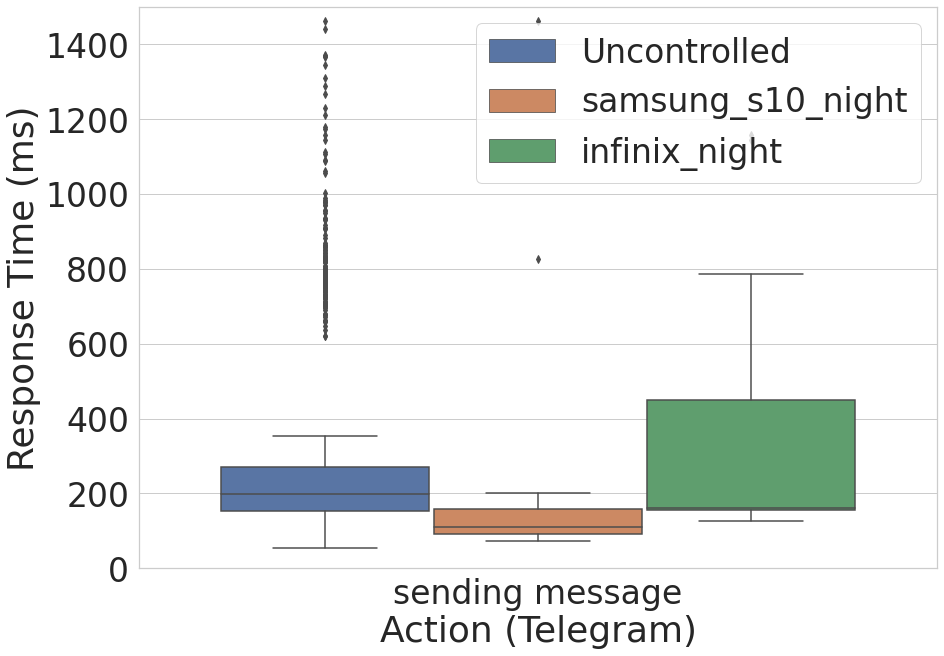

In [ ]:
telegram_df = df[df['APP'] == 'Telegram']
import seaborn as sns
ax = sns.boxplot(x = telegram_df['ACTION'],
            y = telegram_df['LATENCY'],
            hue = telegram_df['STUDENT']).set(xlabel='Action (Telegram)', ylabel='Response Time (ms)')
locs, labels = plt.xticks()
#plt.xticks(locs, ['Search Channel', 'Open Channel', 'Search Video', 'Play Video'])
plt.legend(title=None)

plt.ylim(0, 1500)
plt.savefig('Telegram.pdf', bbox_inches='tight')

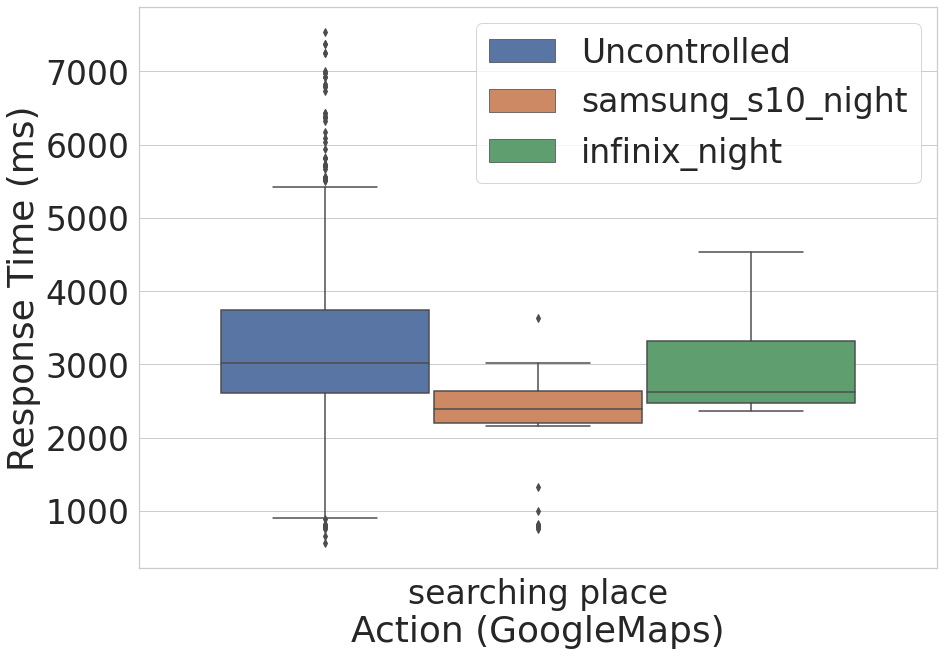

In [ ]:
gmaps_df = df[df['APP'] == 'GoogleMaps']
import seaborn as sns
ax = sns.boxplot(x = gmaps_df['ACTION'],
            y = gmaps_df['LATENCY'],
            hue = gmaps_df['STUDENT']).set(xlabel='Action (GoogleMaps)', ylabel='Response Time (ms)')
locs, labels = plt.xticks()
#plt.xticks(locs, ['Search Channel', 'Open Channel', 'Search Video', 'Play Video'])
plt.legend(title=None)

plt.savefig('GoogleMaps.pdf', bbox_inches='tight')

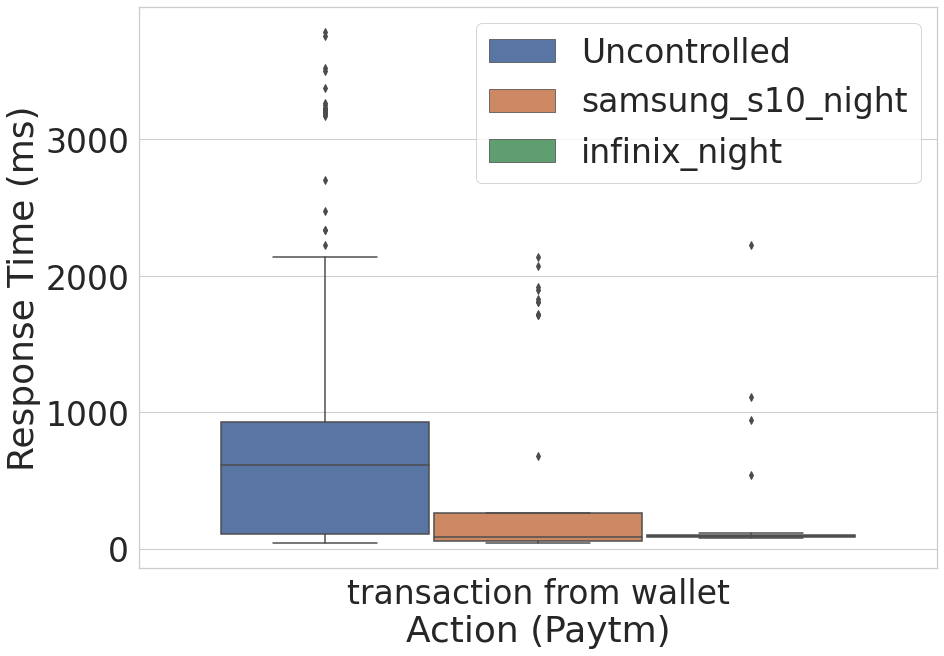

In [ ]:
paytm_df = df[df['APP'] == 'Paytm']
paytm_df = paytm_df[paytm_df.ACTION != 'person profile page']
import seaborn as sns
ax = sns.boxplot(x = paytm_df['ACTION'],
            y = paytm_df['LATENCY'],
            hue = paytm_df['STUDENT']).set(xlabel='Action (Paytm)', ylabel='Response Time (ms)')
locs, labels = plt.xticks()
#plt.xticks(locs, ['Search Channel', 'Open Channel', 'Search Video', 'Play Video'])
plt.legend(title=None)

plt.savefig('Paytm.pdf', bbox_inches='tight')

In [ ]:
df['STUDENT'].unique()

array(['Others', 'infinix_pro', 'samsung_s10'], dtype=object)